In [1]:
from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import numpy as np
from glob import glob

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Model

In [3]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions

In [4]:
# INPUT:PEPROCESSING LAYER
# INCLUDE_TOP=FALSE,THE MODEL CAN BE USED FOR FEATURE EXTRACTION (INPUT_SHAPE AND POOLING CAN BE SPECIFIED BY US)
# INCLUDE_TOP=A FULLY CONNECTED LAYER WILL BE ADDED TO THE MODEL (DEFAULT:1000 IMAGENET)
Image_Size=[224,224]
RESNET=ResNet50(input_shape=Image_Size+[3],weights='imagenet',include_top=False)

In [5]:
# DONT TRAIN EXISTING WEIGHTS AS WEIGHTS ARE ALREADY TRAINED IN RESNET50:
# RESNET.LAYERS=FALSE
for Layer in RESNET.layers:
    Layer.trainable=False

In [6]:
# GLOB:USEFUL FOR GETTING NUMBER OF CLASSES/FILES
Train_Path='Dataset\Training_Set'
Test_Path='Dataset\Test_Set'

In [7]:
Train_Files=glob(Train_Path+'/*/*.jpg')
Train_Files

['Dataset\\Training_Set\\Cats\\cat.3701.jpg',
 'Dataset\\Training_Set\\Cats\\cat.3702.jpg',
 'Dataset\\Training_Set\\Cats\\cat.3703.jpg',
 'Dataset\\Training_Set\\Cats\\cat.3704.jpg',
 'Dataset\\Training_Set\\Cats\\cat.3705.jpg',
 'Dataset\\Training_Set\\Cats\\cat.3706.jpg',
 'Dataset\\Training_Set\\Cats\\cat.3707.jpg',
 'Dataset\\Training_Set\\Cats\\cat.3708.jpg',
 'Dataset\\Training_Set\\Cats\\cat.3709.jpg',
 'Dataset\\Training_Set\\Cats\\cat.3710.jpg',
 'Dataset\\Training_Set\\Cats\\cat.3711.jpg',
 'Dataset\\Training_Set\\Cats\\cat.3712.jpg',
 'Dataset\\Training_Set\\Cats\\cat.3713.jpg',
 'Dataset\\Training_Set\\Cats\\cat.3714.jpg',
 'Dataset\\Training_Set\\Cats\\cat.3715.jpg',
 'Dataset\\Training_Set\\Cats\\cat.3716.jpg',
 'Dataset\\Training_Set\\Cats\\cat.3717.jpg',
 'Dataset\\Training_Set\\Cats\\cat.3718.jpg',
 'Dataset\\Training_Set\\Cats\\cat.3719.jpg',
 'Dataset\\Training_Set\\Cats\\cat.3720.jpg',
 'Dataset\\Training_Set\\Cats\\cat.3721.jpg',
 'Dataset\\Training_Set\\Cats\\cat

In [8]:
Test_Files=glob(Test_Path+'/*/*.jpg')
Test_Files

['Dataset\\Test_Set\\Cats\\cat.4803(1).jpg',
 'Dataset\\Test_Set\\Cats\\cat.4803.jpg',
 'Dataset\\Test_Set\\Cats\\cat.4804.jpg',
 'Dataset\\Test_Set\\Cats\\cat.4805.jpg',
 'Dataset\\Test_Set\\Cats\\cat.4806.jpg',
 'Dataset\\Test_Set\\Cats\\cat.4807.jpg',
 'Dataset\\Test_Set\\Cats\\cat.4808.jpg',
 'Dataset\\Test_Set\\Cats\\cat.4809.jpg',
 'Dataset\\Test_Set\\Cats\\cat.4810.jpg',
 'Dataset\\Test_Set\\Cats\\cat.4811.jpg',
 'Dataset\\Test_Set\\Cats\\cat.4812.jpg',
 'Dataset\\Test_Set\\Cats\\cat.4813.jpg',
 'Dataset\\Test_Set\\Cats\\cat.4814.jpg',
 'Dataset\\Test_Set\\Cats\\cat.4815.jpg',
 'Dataset\\Test_Set\\Cats\\cat.4816.jpg',
 'Dataset\\Test_Set\\Cats\\cat.4817(1).jpg',
 'Dataset\\Test_Set\\Cats\\cat.4817.jpg',
 'Dataset\\Test_Set\\Cats\\cat.4818.jpg',
 'Dataset\\Test_Set\\Cats\\cat.4819.jpg',
 'Dataset\\Test_Set\\Cats\\cat.4820.jpg',
 'Dataset\\Test_Set\\Cats\\cat.4821.jpg',
 'Dataset\\Test_Set\\Cats\\cat.4822.jpg',
 'Dataset\\Test_Set\\Cats\\cat.4823.jpg',
 'Dataset\\Test_Set\\Cats\\c

In [9]:
Folders=glob(Train_Path+'/*')

In [10]:
Folders

['Dataset\\Training_Set\\Cats', 'Dataset\\Training_Set\\Dogs']

In [11]:
len(Folders)

2

In [12]:
# OUTPUT:
# FLATTENING THE LAST LAYER OF RSENET OUTPUT
x=Flatten()(RESNET.output)
# x=Dense(1000,activation='softmax')(x)
# FOR CATEGORICAL:len(Folders)
Prediction=Dense(1,activation='sigmoid')(x)


In [13]:
# CREATE A MODEL OBJECT:
Model=Model(inputs=RESNET.input,outputs=Prediction)

In [14]:
Model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [15]:
Model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
from tensorflow.keras.callbacks import EarlyStopping
Early_Stopping=EarlyStopping(monitor='val_loss',patience=1) 

In [17]:
Image_Gen=ImageDataGenerator(rotation_range=30,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             rescale=1/255,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest'
                            )

In [18]:
Image_Gen.flow_from_directory('Dataset/Training_Set')

Found 600 images belonging to 2 classes.


In [19]:
Image_Gen.flow_from_directory('Dataset/Test_Set')

Found 400 images belonging to 2 classes.


In [20]:
batch_size=32

In [21]:
Train_Image_Gen=Image_Gen.flow_from_directory('Dataset/Training_Set',
                                              target_size=(224,224), 
                                              batch_size=32,
                                              class_mode='binary'
                                             )

Found 600 images belonging to 2 classes.


In [22]:
Test_Image_Gen=Image_Gen.flow_from_directory('Dataset/Test_Set',
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='binary',
                                             )

Found 400 images belonging to 2 classes.


In [23]:
Train_Image_Gen.class_indices

{'Cats': 0, 'Dogs': 1}

In [24]:
Test_Image_Gen.class_indices

{'Cats': 0, 'Dogs': 1}

In [25]:
Model.fit_generator(Train_Image_Gen,validation_data=Test_Image_Gen,epochs=5,validation_steps=5,steps_per_epoch=15,callbacks=[Early_Stopping])                    

Epoch 1/5
15/15 [==============================] - 520s 35s/step - loss: 1.0047 - accuracy: 0.8220 - val_loss: 4.1432 - val_accuracy: 0.4938
Epoch 2/5
15/15 [==============================] - 522s 35s/step - loss: 0.5107 - accuracy: 0.9258 - val_loss: 4.9847 - val_accuracy: 0.4938


In [26]:
# PREDICTION:
Cat='Dataset/Test_Set/Cats/Cat.5000.jpg'
Cat_Image=image.load_img(Cat,target_size=(224,224))
Cat_Image=image.img_to_array(Cat_Image)
Cat_Image=np.expand_dims(Cat_Image,axis=0)

In [27]:
Cat_Image=Cat_Image/255

In [28]:
Model.predict(Cat_Image)

array([[4.140906e-05]], dtype=float32)

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
Metrics=pd.DataFrame(Model.history.history)

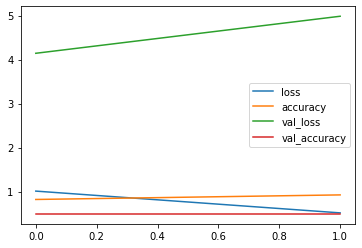

In [30]:
Metrics.plot()

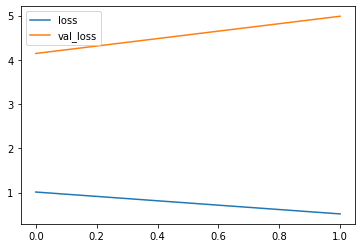

In [31]:
Metrics[['loss','val_loss']].plot()

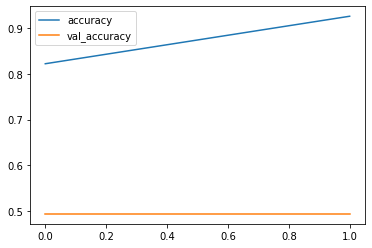

In [32]:
Metrics[['accuracy','val_accuracy']].plot()